# Advertising Sales Channel Prediction

### Import Libraries

In [1]:
# Import libraries
# Data processing packages
import pandas as pd
import numpy as np
import scipy.stats as stats

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [2]:
df=pd.read_csv('../Datasets/Advertising.csv',header=0,names=['SNo','TV','Radio','Newspaper','Sales'])
df

,SNo,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Dataset is having numeric type columns i.e. continuous values in the data.

### Project Description 

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The target to predict is the total sales generated from all the sales channel.  

Since target values are continuous, this is a regression problem.

In [3]:
#Checking the dataset shape
df.shape

(200, 5)

Dataset has 200 rows and 5 columns (4 input features and 1 output feature).

In [4]:
# Checking columns
df.columns

Index(['SNo', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Columns names are displayed where 'Sales' is the target variable and all other are independent variables.

In [5]:
# Checking datatypes
df.dtypes

SNo            int64
TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

All columns datatypes are continuous in nature i.e. integer and float.

In [6]:
# Checking dataset schema
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Here, we get the information regarding dataset i.e. RangeIndex,Dtype,Non-null count. There are no nulls in the dataset. Datatypes also seem good.

### Data Preprocessing

In [7]:
# Checking unique values counts
for i in df.columns :
    print(i,' : ',df[i].nunique())
    #print(df[i].unique())
    print('-----------------')

SNo  :  200
-----------------
TV  :  190
-----------------
Radio  :  167
-----------------
Newspaper  :  172
-----------------
Sales  :  121
-----------------


Column 'SNo' is having 200 unique values which is equal to total number of rows in the dataset and hence it is not relevant in model training.

In [8]:
# Sno is not required to be fed to the model we can drop the column
df.drop('SNo',axis=1,inplace=True)

### EDA and Visualizations

In [9]:
#Checking null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no null values in the dataset.

<AxesSubplot:>

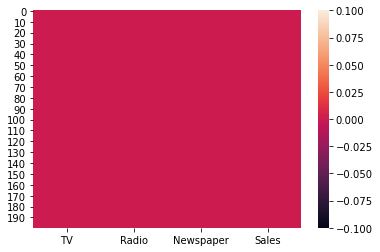

In [10]:
#Heatmap for null values
sns.heatmap(df.isnull())

In [11]:
# Checking for duplicates
df[df.duplicated()].count()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

There are no duplicate rows in the dataset.

In [12]:
# Describe dataset
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Values in column 'TV' ranges from 0.7 to 296.4. Values in column 'Radio' ranges from 0.0 to 49.6. Values in column 'Newspaper' ranges from 0.3 to 114.0. Values in target column 'Sales' ranges from 1.6 to 27.0. 

TV is left skewed (mean<median). Radio, Newspaper & Sales are right skewed (mean>median).

All the columns have high standard deviation except target column. Difference in 75% and max is high in Newspaper hence Outliers might exist. 

In [13]:
# Checking correlation
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

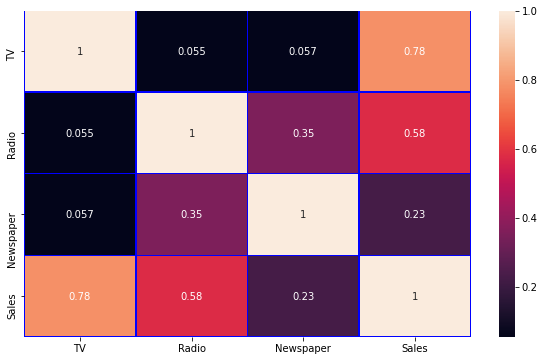

In [14]:
# Plotting correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='b')

TV and Radio are strongly linearly correlated with target column Sales. Newspaper has a good correlation with target. Radio and Newspaper has good correlation. Multicollinearity might exists.

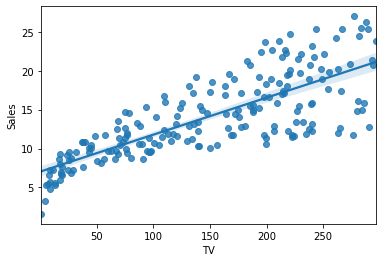

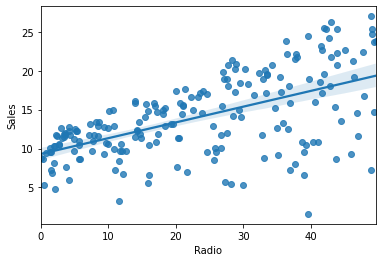

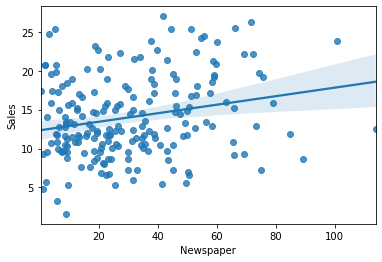

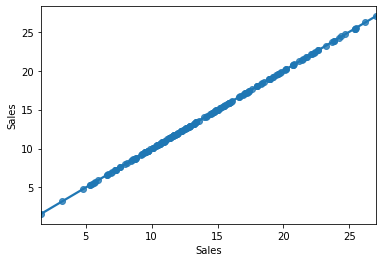

In [15]:
# Plotting target with every other column for analysis
for i in df.columns :
    #print(i)
    sns.regplot(i,'Sales',data=df)
    plt.show()

Regplot gives a best fit line on which maximum points are lying.
Plot showing high linear correlation of TV and Radio with target column Sales. Newspaper also has a good correlation with target.

<AxesSubplot:xlabel='Sales', ylabel='Newspaper'>

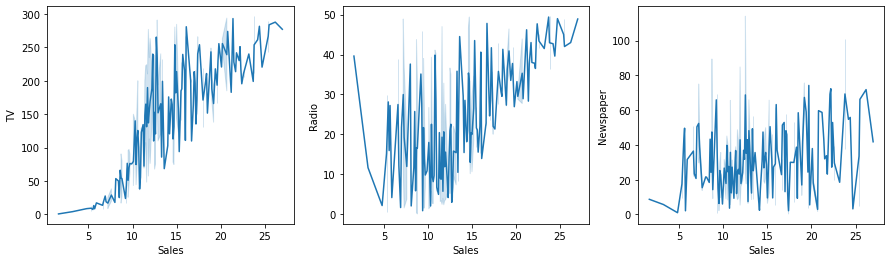

In [16]:
# Visualizing with Lineplot 
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)
sns.lineplot(data=df, x='Sales', y='TV')

plt.subplot(1, 3, 2)
sns.lineplot(data=df, x='Sales', y='Radio')

plt.subplot(1, 3, 3)
sns.lineplot(data=df, x='Sales', y='Newspaper')

Observations of Lineplot are as below :

There is increase in Sales with increase in the money spent on TV for advertising.

Initial investment in Radio for advertisement is high for making the increase in Sales and there are many ups and downs of money spent on Radio for advertising to have an increase in the Sales.

Plot is not showing any defined relation of money spent on Newspaper for have an increase in Sales. Here, with some balanced investments on Newspaper advertisement, Sales is growing.

<AxesSubplot:xlabel='Sales'>

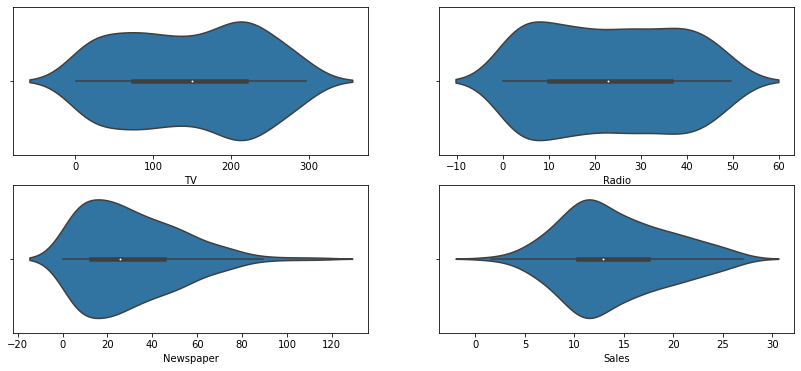

In [17]:
# Visualizing with violinplot 
plt.figure(figsize=(14,6))

plt.subplot(2, 2, 1)
sns.violinplot(df['TV'])

plt.subplot(2, 2, 2)
sns.violinplot(df['Radio'])

plt.subplot(2, 2, 3)
sns.violinplot(df['Newspaper'])

plt.subplot(2, 2, 4)
sns.violinplot(df['Sales'])

Violinplot observations are as below :

Money spent on TV is highly between 150 to 250.
Money spent on Radio is mostly from 4 to 15.
Money spent on Newspaper is mostly from 8 to 23.
Sale is highly between 9 to 16.

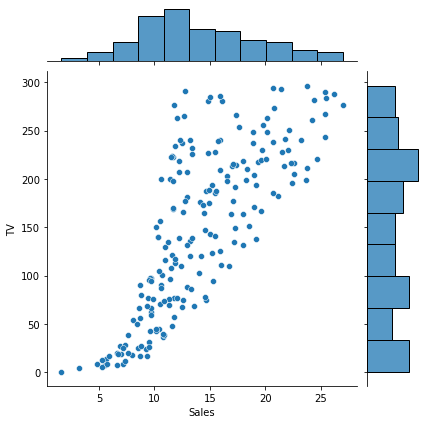

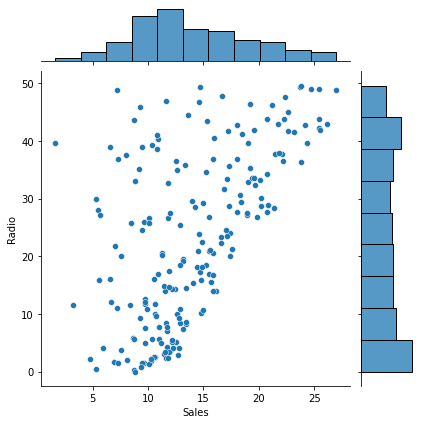

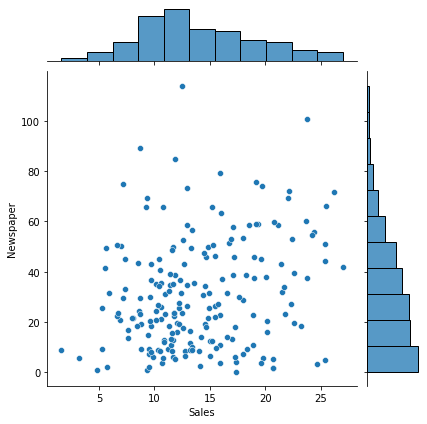

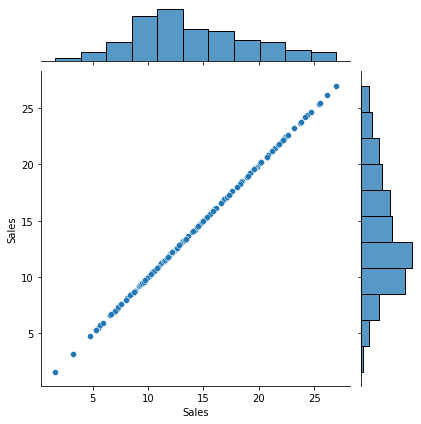

In [18]:
# Visualizing with Jointplot
for i in df.columns :
    sns.jointplot(x=df['Sales'],y=df[i])
    plt.show()

Jointplot showing money is highly spent on TV between 150 to 250 with continuous increase in Sales. Highest money spent on Radio was in the initial phase. Initially money spent on Newspaper is higher and high amount on Newspaper advertisement is least paid. Hence, we can say Newspaper is the cheapest medium for advertisement.

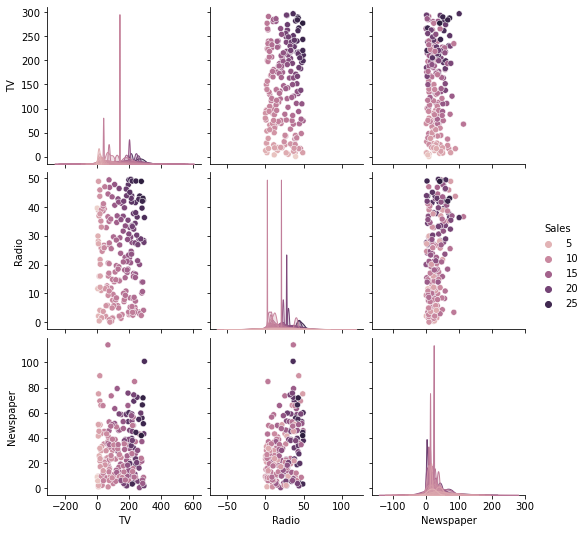

In [19]:
#Pairplot
sns.pairplot(df,hue='Sales')

We can see there is overlapping of data in the plot. 

Sales is highest when money spent on TV is above 150 and on Radio is above 30. Sales is highest when money spent on TV is above 170 and on Newspaper is between 0-100. Sales is highest when money spent on Radio is above 30 and on Newspaper is between 0-100.

In [20]:
#Checking outliers
from scipy.stats import zscore

z=np.abs(zscore(df))
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [21]:
#Checking value in z having greater than 3 value
z[16]

array([0.92530498, 0.9004942 , 3.84117072, 0.29254112])

TV              AxesSubplot(0.125,0.125;0.168478x0.755)
Radio        AxesSubplot(0.327174,0.125;0.168478x0.755)
Newspaper    AxesSubplot(0.529348,0.125;0.168478x0.755)
Sales        AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

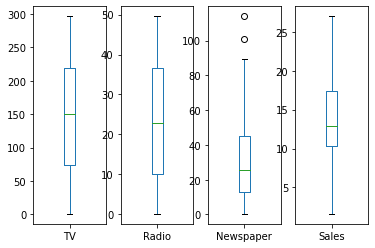

In [22]:
#Plotting outliers with boxplot
df.plot(kind='box',subplots=True)

A few outliers are present in the dataset

In [23]:
#Checking skewness
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
      dtype=object)

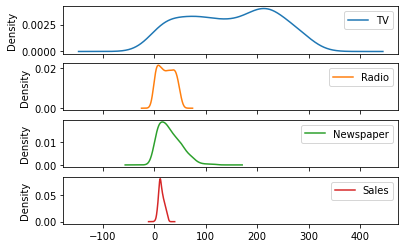

In [24]:
# Visualizing skewness 
df.plot(kind='kde',subplots=True)

Skewness is present in the dataset in column Newspaper.

### Data Cleaning

In [25]:
# Creating new dataset without target column 
df_indep=df.copy()
df_indep.drop('Sales',axis=1,inplace=True)
df_indep.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


Outliers detection and Skewness removal are not performed on target column as it will change the actual target values, hence dropped the target column for further analysis.

In [26]:
# Removing outliers
df_outliers=df_indep[(z<3).all(axis=1)]
df_outliers

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
# Percentage Data Loss
loss_percent=(200-198)/200 * 100
loss_percent

1.0

Just 1% data is lost after removing skewness.

In [28]:
# Checking skewness after removing outliers
df_outliers.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
dtype: float64

Skewness of Newspaper column has been reduced after removing outliers but needs to be reduced more.

In [29]:
#Removing skewness
df_skew=df_outliers.copy()
df_skew['Newspaper']=np.log(df_skew['Newspaper']+1)
df_skew.skew()

TV          -0.082332
Radio        0.114842
Newspaper   -0.839481
dtype: float64

Skewness of Newspaper is increasing on applying log transformation hence based on the kind of distribution, we will consider the current values as skewness threshold.

### Combining independent and target variables for further process

In [30]:
# Combining independent and dependent columns
dff=pd.concat([df_outliers,df['Sales']],axis=1)

# Dropping nulls if any
dff.dropna(inplace=True)

# Checkinh nulls in new dataset
dff.isnull().sum().any()

False

Combined all the columns and removed nulls from the final dataset.

### Separating the columns into x and y

In [31]:
# Dataset x
x=dff.iloc[:,:3]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [32]:
# Dataset y
y=dff.iloc[:,-1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 198, dtype: float64

### Multicollinearity with VIF

In [33]:
# Importing libraries
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
def calc_vif(x) :
    vif=pd.DataFrame()
    vif['Variables'] = x.columns
    vif['VIF Factors']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

calc_vif(x)

,Variables,VIF Factors
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


There is no multicollinearity present.

### Scaling : Standard Scaler / Min-Max Scaler

In [35]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x)
x1

array([[ 0.97869734,  0.98952135,  1.93299778],
       [-1.19901165,  1.09070498,  0.75131275],
       [-1.51933199,  1.53591293,  1.93790103],
       [ 0.05645636,  1.22561648,  1.40834924],
       [ 0.40024339, -0.83178391,  1.40344598],
       [-1.61906543,  1.73828018,  2.2173867 ],
       [-1.04647815,  0.6522426 , -0.30779084],
       [-0.31079737, -0.23817331, -0.89127846],
       [-1.62023876, -1.41864895, -1.41102374],
       [ 0.62317696, -1.38492107, -0.42056576],
       [-0.94557138, -1.16906267, -0.27346804],
       [ 0.79800381,  0.05863199, -1.26392602],
       [-1.44189191,  0.80739083,  1.77119028],
       [-0.57714432, -1.04764232, -1.10702179],
       [ 0.67363035,  0.65898817,  0.79544207],
       [ 0.57155024,  1.65733328,  1.13376683],
       [ 1.58061798,  1.1109417 ,  1.27596129],
       [-0.90919801, -0.17746313, -0.56276022],
       [ 0.0071763 ,  0.05188642, -0.52353416],
       [ 0.84141719,  0.30821827,  1.15828311],
       [ 1.06435076, -1.21628169, -0.307

Independent variables are scaled/standardized.

### Find best randon state for Train-Test Split

In [36]:
#Importing required libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [37]:
#Finding out the best random state

maxAcc=0
rs=0
for i in range(0,100) :
    x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=i)
    
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predtest=lr.predict(x_test)
    acctrain=r2_score(y_train,predtrain)
    acctest=r2_score(y_test,predtest)
    #if round(acctrain,2)==round(acctest,2) :
    #    print('Best random state : ',i,' Accuracy(Training) : ',acctrain*100,' Accuracy(Testing) : ',acctest*100)
        
    if acctest>maxAcc :
        maxAcc=acctest
        rs=i      
print('Final Best random state : ',rs,' Accuracy(Training) : ',acctrain,' Accuracy(Testing) : ',maxAcc)

Final Best random state :  90  Accuracy(Training) :  0.8832087051413472  Accuracy(Testing) :  0.9477136584598765


Here, random state=90 is giving a good accuracy. So, lets take 90 as our best random state.

In [38]:
# train-test split with best randon state and finding the train and test set shape after splittng
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=90)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


### Finding the best algorithm

In [39]:
#Importing required libraries
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [40]:
# Making instance of regressors
lr=LinearRegression()
knn=KNeighborsRegressor()
svr=SVR()
rf=RandomForestRegressor()

In [44]:
#Executing all algorithms in a single for loop

algo_list=[lr,knn,svr,rf]
svr_kernel=['rbf','poly','linear']
Acc=0
kv=''
for i in algo_list :    
    if i==svr :
        for j in svr_kernel :
            svr=SVR(kernel=j)
            svr.fit(x_train,y_train)
            pred=svr.predict(x_test)
            acc=r2_score(y_test,pred)
            if acc>Acc :
                Acc=acc
                kv=j
        svr1=SVR(kernel=j)
        print(svr1)
        svr1.fit(x_train,y_train)
        predtrain=svr1.predict(x_train)
        predtest=svr1.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
    
    else :
        print(i)
        i.fit(x_train,y_train)
        predtrain=i.predict(x_train)
        predtest=i.predict(x_test)
        acctrain=r2_score(y_train,predtrain)
        acctest=r2_score(y_test,predtest)
        err1=mean_absolute_error(y_test,predtest)
        err2=mean_squared_error(y_test,predtest)
    
    print('Accuracy(Training) : ',acctrain*100,' Accuracy(Test) ',acctest*100)
    print('mean_absolute_error',mean_absolute_error(y_test,predtest))
    print('mean_squared_error',mean_squared_error(y_test,predtest))
    print('\n')

LinearRegression()
Accuracy(Training) :  87.91542940797822  Accuracy(Test)  94.77136584598766
mean_absolute_error 1.02313522762095
mean_squared_error 1.5762554238734874


KNeighborsRegressor()
Accuracy(Training) :  95.57577420412402  Accuracy(Test)  94.138277616713
mean_absolute_error 0.9284999999999999
mean_squared_error 1.7671099999999993


SVR(kernel='linear')
Accuracy(Training) :  86.09898531813607  Accuracy(Test)  92.26322082111363
mean_absolute_error 1.122736181901572
mean_squared_error 2.332375871942156


RandomForestRegressor()
Accuracy(Training) :  99.61758402243215  Accuracy(Test)  98.15278779364837
mean_absolute_error 0.623775
mean_squared_error 0.5568716749999998




RandomForestRegressor() has the highest accuracy and least error.

### Cross Validation

In [45]:
# Computing cross validation score of all the models used
from sklearn.model_selection import cross_val_score

for i in algo_list :
    print('CV mean of ',i,' is ',cross_val_score(i,x1,y,cv=5).mean())

CV mean of  LinearRegression()  is  0.8853605756683912
CV mean of  KNeighborsRegressor()  is  0.9367560788064591
CV mean of  SVR(kernel='linear')  is  0.8759677907869561
CV mean of  RandomForestRegressor()  is  0.9765425219665012


RandomForestRegressor() has the highest accuracy and least difference in accuracy and Cross validation mean. So, lets select RandomForestRegressor() as the best algorithm.

### Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':['mse', 'mae','poisson'],
              'max_features':['auto', 'sqrt', 'log2'],
              'max_depth': [5, 10, None],
              'n_estimators': [10,50,100]}

rf=RandomForestRegressor()
GCV=GridSearchCV(rf,parameters,cv=4)
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'mae',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 50}

Using hyper parameter tuning for better accuracy and to avoid overfitting issues with best parameters on selected model.

In [47]:
rf=RandomForestRegressor(criterion='mae', max_features='auto', max_depth=None, n_estimators=50)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=r2_score(y_test,pred)
cv=cross_val_score(rf,x1,y,cv=5).mean()

print('R2_score : ',acc,' CV mean : ',cv)

R2_score :  0.9835653108476579  CV mean :  0.9758451334170859


Executed the selected model with hyper tuned parameters for better accuracy.

#### We are getting model accuracy as 98% and cross validation score as approx 98% which shows our model is performing good.

### AUC-ROC Curve

For random forest ROC AUC is not available, because there is no cut-off value for this algorithm, and ROC AUC is only calculable in the case if the algorithm returns a continuous probability value (and only 1 value) for an unseen element.

### Saving the model

In [48]:
# Saved the model in .pkl file
import pickle
file='Advertising.pkl'
pickle.dump(rf,open(file,'wb'))

### Conclusion

In [49]:
# Loading the model for checking score on actual and predicted test sets
load_model=pickle.load(open(file,'rb'))
result=load_model.score(x_test,y_test)
result

0.9835653108476579

In [50]:
#Printing the shapes of test sets to make comparison dataframe
print(x_test.shape)
print(y_test.shape)

(40, 3)
(40,)


In [51]:
# Comparison dataframe having Original and Predicted values
actual=np.array(y_test)
predicted=np.array(rf.predict(x_test))
conclusion=pd.DataFrame({'Orignal':actual,'Predicted':np.round(predicted,1)})
conclusion[:20]

,Orignal,Predicted
0,18.0,17.7
1,5.6,6.4
2,22.3,23.0
3,19.6,19.0
4,16.6,15.9
5,22.2,21.3
6,21.5,21.2
7,13.2,12.5
8,22.4,23.1
9,8.8,8.7
